In [1]:
from challenging_kelvin import calculate_wake
import matplotlib.pyplot as plt
import numpy as np

In [2]:
R, d, l = 64, 0.0625, 0.002
x0, phi0 = calculate_wake(l, R, d, 0)
x1, phi1 = calculate_wake(l, R, d, 1)
half = phi0.shape[0] / 2

In [3]:
print(x0)

[-50.26548246 -50.21634709 -50.16721172 ...,  50.16721172  50.21634709
  50.26548246]


In [4]:
phi0 = phi0[half/2:-half/2, :half]
phi1 = phi1[half/2:-half/2, :half]

(-7.9998113527161049e-05, 7.9998821215256593e-05)
((-0.00042744148622512058+1.4459555881986693e-09j), (0.00019893402233413774+3.3228652956816763e-08j))


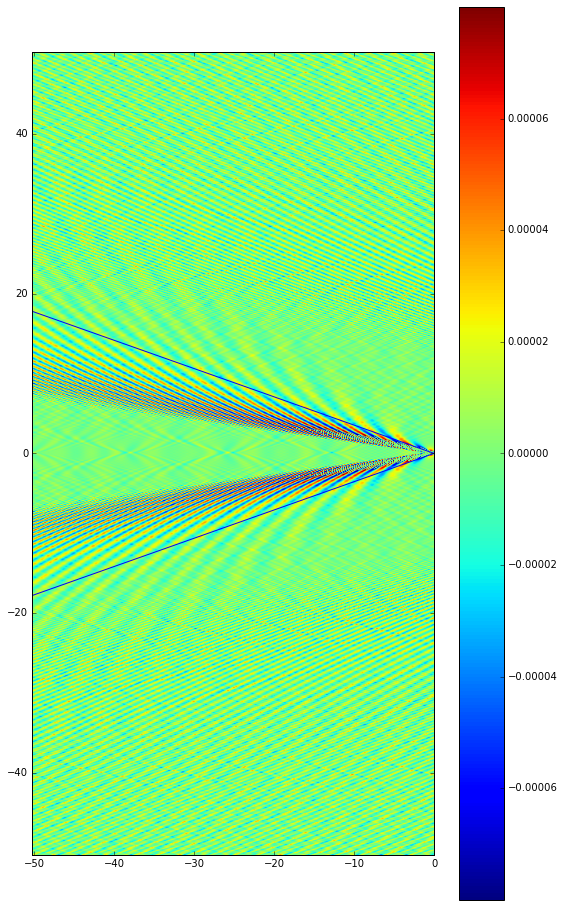

In [9]:
toshow = np.real(phi0) * (np.abs(phi0) < 0.00008)
#toshow *= np.abs(phi0) < 200
print(np.min(toshow), np.max(toshow))
print(np.min(phi0), np.max(phi0))
fig=plt.figure(figsize=(9, 16))
plt.imshow(toshow, extent=[x0[0], 0, x0[0], x0[-1]])
plt.colorbar()
#x = np.arange(-R, 0+d, d)
plt.plot(x0, np.sqrt(x0**2.0 / 8.), color='blue')
plt.plot(x0, -np.sqrt(x0**2.0 / 8.), color='blue')
plt.xlim([x0[0], 0])
plt.ylim([x0[0], x0[-1]])
plt.show()

In [5]:
phis = []
xs = []
Rs = [1, 1.25, 1.5, 1.75, 2, 4, 8, 16, 32, 64, 128]
for r in Rs:
    x, p= calculate_wake(l, r, d, 1)
    xs.append(x)
    phis.append(p)
    #phis.append(calculate_wake(l, r, d, 0))

In [15]:
bounds = [0.0003, 100, 0.0012, 100, 0.00256, 0.00128, 0.00064, 0.00032, 0.00016, 0.00008, 0.00004]
for ind in range(len(phis)):
    phi = phis[ind]
    x = xs[ind]
    half = phi.shape[0] / 2
    phi = phi[half/2:-half/2, :half]
    r = x[-1]
    print(np.min(phi), np.max(phi), bounds[ind])
    toshow = np.real(phi) * (np.abs(np.real(phi)) < bounds[ind])
    fig = plt.figure()
    plt.imshow(toshow, extent=[-r, 0, -r, r])
    plt.plot(x, np.sqrt(x**2.0 / 8.), color='blue')
    plt.plot(x, -np.sqrt(x**2.0 / 8.), color='blue')
    angle = np.arctan(np.sqrt(Rs[ind] - 1.) / (2. * Rs[ind] - 1.))
    #angle = 1 / np.sqrt(r)
    slope = np.tan(angle)
    plt.plot(x, slope * x, color='red')
    plt.plot(x, -slope * x, color='red')
    plt.xlim([-r, 0])
    plt.xlabel('X')
    plt.ylim([-r, r])
    plt.ylabel('Y')
    plt.title('kmax=%f, step=%f' % (Rs[ind], d))
    plt.colorbar()
    filename='l=%f_kmax=%f_step=%f' % (l, Rs[ind], d)
    fig.savefig('C:\Users\Jonathan\Documents\School\Kolomeisky\challenging_kelvin\%s.png' % filename)
    plt.show()

NameError: name 'phis' is not defined

In [ ]:
ind = 3
bound = 0.00032
phi = phis[ind]
half = phi.shape[0] / 2
phi = phi[half/2:-half/2, :half]
r = Rs[ind]
print(np.min(phi), np.max(phi), bound)
toshow = np.real(phi) * (np.abs(np.real(phi)) < bound)
fig = plt.figure(figsize=(12, 12))
plt.imshow(toshow, extent=[-r, 0, -r, r])
plt.colorbar()
x = np.arange(-r, 0+d, d)
plt.plot(x, np.sqrt(x**2.0 / 8.), color='blue')
plt.plot(x, -np.sqrt(x**2.0 / 8.), color='blue')
angle = np.arctan(np.sqrt(r - 1.) / (2. * r - 1.))
slope = np.tan(angle)
plt.plot(x, slope * x, color='red')
plt.plot(x, -slope * x, color='red')
plt.xlim([-r, 0])
plt.ylim([-r, r])
plt.title('kmax=%d, step=%f' % (r, d))
plt.figure(figsize=(12, 12))
plt.imshow(np.abs(np.real(phi)) > bound, extent=[-r, 0, -r, r])
plt.colorbar()
plt.show()

In [3]:
p2s = []
xs2 = []
kmax = [4, 8]
for k in kmax:
    x, p= calculate_wake(l, k, d/2, 1)
    xs2.append(x)
    print(x[0], x[-1])
    p2s.append(p)
    #phis.append(calculate_wake(l, r, d, 0))

(-100.53096491487338, 100.53096491487338)
(-100.53096491487338, 100.53096491487338)


((-0.00044560456696562283+2.0651645166935597e-06j), (0.00033215495234069088+6.9144342072271754e-07j), 100)
l=0.002000_kmax=4.000000_step=0.031250


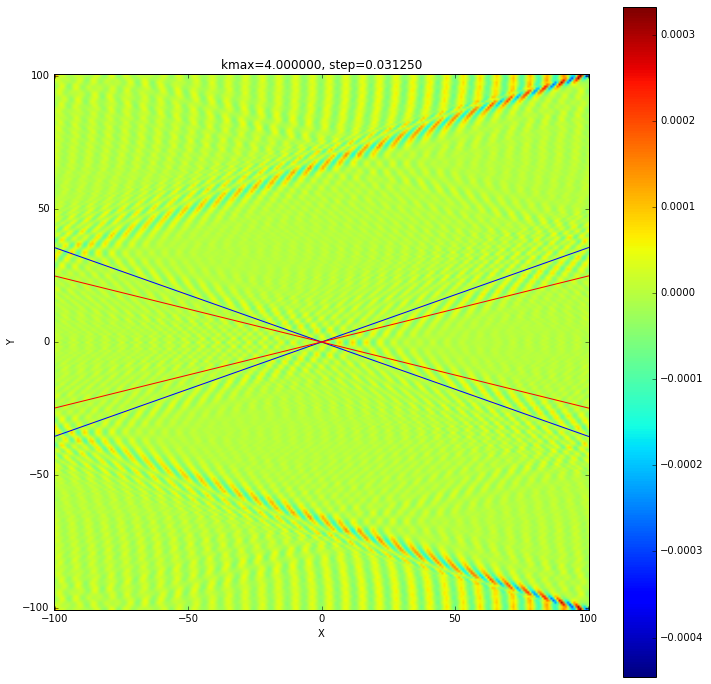

((-0.00035253638781783901-7.1201766490595464e-08j), (0.0002500708777986857-4.0395313133477849e-07j), 100)
l=0.002000_kmax=8.000000_step=0.031250


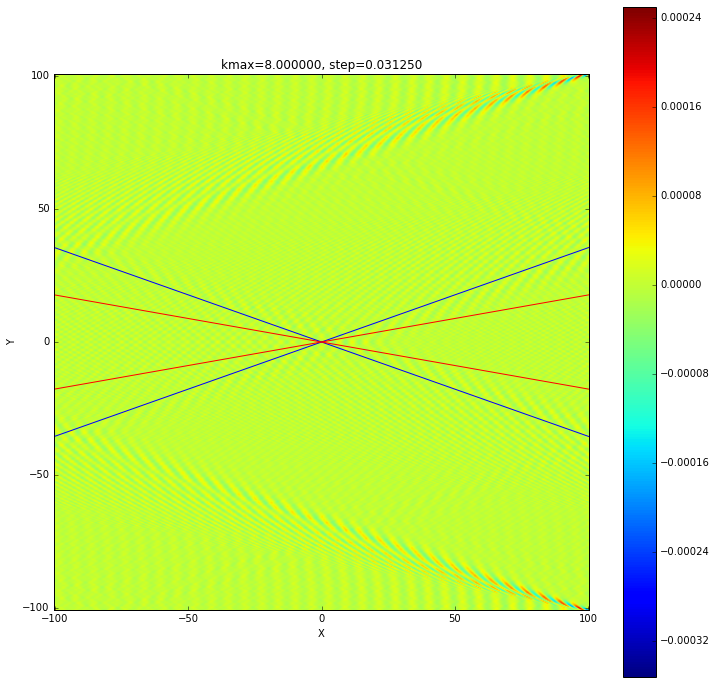

In [5]:
bnds = [100, 100]
for ind in range(len(p2s)):
    phi = p2s[ind]
    x = xs2[ind]
    #half = phi.shape[0] / 2
    #phi = phi[half/2:-half/2, :half]
    r = x[-1]
    print(np.min(phi), np.max(phi), bnds[ind])
    toshow = np.real(phi) * (np.abs(np.real(phi)) < bnds[ind])
    fig = plt.figure(figsize=(12, 12))
    plt.imshow(toshow, extent=[-r, r, -r, r])
    plt.plot(x, np.sqrt(x**2.0 / 8.), color='blue')
    plt.plot(x, -np.sqrt(x**2.0 / 8.), color='blue')
    angle = np.arctan(np.sqrt(kmax[ind] - 1.) / (2. * kmax[ind] - 1.))
    #angle = 1 / np.sqrt(r)
    slope = np.tan(angle)
    plt.plot(x, slope * x, color='red')
    plt.plot(x, -slope * x, color='red')
    plt.xlim([-r, r])
    plt.xlabel('X')
    plt.ylim([-r, r])
    plt.ylabel('Y')
    plt.title('kmax=%f, step=%f' % (kmax[ind], d/2))
    plt.colorbar()
    filename='l=%f_kmax=%f_step=%f' % (l, kmax[ind], d/2)
    print(filename)
    #fig.savefig('C:\Users\Jonathan\Documents\School\Kolomeisky\challenging_kelvin\%s.png' % filename)
    plt.show()